# Vikrant Rajput
## Data Science & Business Analytics Intern 
### FEB21@The Sparks Foundation

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the training Data

In [2]:
dataset_train = pd.read_csv('Train_TCS.csv')

In [3]:
dataset_train.isnull().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

In [4]:
dataset_train.dropna(inplace = True )
dataset_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create a data structure with 60 timestep and 1 output

In [7]:
X_train = []
y_train = []
length = len(training_set_scaled)
for i in range(60,length):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
    
X_train,y_train = np.array(X_train), np.array(y_train)

# Reshape

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

# Importing the keras Libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Model

In [10]:
regressor = Sequential()

In [11]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units= 100, return_sequences=True, input_shape=(X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

# Adding a second LSTM Layer and some dropout regularization
regressor.add(LSTM(units= 100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some dropout regularzation
regressor.add(LSTM(units= 100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some dropout regularization
regressor.add(LSTM(units= 100))
regressor.add(Dropout(0.2))

# Adding a Output Layer
regressor.add(Dense(units=1))

# Compile & Train Model

In [12]:
regressor.compile(optimizer='adam', loss= 'MSE')

regressor.fit(X_train,y_train, batch_size=32, epochs=100)

Epoch 1/100
83/83 [==============================] - 19s 129ms/step - loss: 0.0303
Epoch 2/100
83/83 [==============================] - 10s 126ms/step - loss: 0.0015
Epoch 3/100
83/83 [==============================] - 10s 124ms/step - loss: 0.0019
Epoch 4/100
83/83 [==============================] - 10s 124ms/step - loss: 0.0015
Epoch 5/100
83/83 [==============================] - 10s 126ms/step - loss: 0.0013
Epoch 6/100
83/83 [==============================] - 11s 129ms/step - loss: 0.0011
Epoch 7/100
83/83 [==============================] - 11s 128ms/step - loss: 0.0012
Epoch 8/100
83/83 [==============================] - 11s 130ms/step - loss: 0.0013
Epoch 9/100
83/83 [==============================] - 11s 128ms/step - loss: 0.0012
Epoch 10/100
83/83 [==============================] - 11s 129ms/step - loss: 0.0012
Epoch 11/100
83/83 [==============================] - 11s 130ms/step - loss: 0.0011
Epoch 12/100
83/83 [==============================] - 11s 129ms/step - loss: 0.0011
E

83/83 [==============================] - 11s 129ms/step - loss: 3.9845e-04
Epoch 95/100
83/83 [==============================] - 11s 127ms/step - loss: 3.8123e-04
Epoch 96/100
83/83 [==============================] - 11s 127ms/step - loss: 3.7004e-04
Epoch 97/100
83/83 [==============================] - 11s 128ms/step - loss: 4.3378e-04
Epoch 98/100
83/83 [==============================] - 11s 129ms/step - loss: 3.8144e-04
Epoch 99/100
83/83 [==============================] - 11s 127ms/step - loss: 4.3190e-04
Epoch 100/100
83/83 [==============================] - 11s 128ms/step - loss: 4.2942e-04


# Predicted Value

In [13]:
dataset_test = pd.read_csv('test_TCS.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [17]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(predicted_stock_price, real_stock_price)
print("mean Squared Error: ", MSE)

mean Squared Error:  14814.188333089332


In [15]:
compare_price = pd.DataFrame({'real_stock_price': dataset_test.iloc[:, 1].values, 'predicted_stock_price':predicted_stock_price.flatten(), 'diffreance':abs(dataset_test.iloc[:, 1].values-predicted_stock_price.flatten())}).reset_index()
compare_price

,index,real_stock_price,predicted_stock_price,diffreance
0,0,3090.000000,2993.873047,96.126953
1,1,3230.000000,2996.510254,233.489746
2,2,3176.449951,3089.971436,86.478515
3,3,3175.000000,3082.161377,92.838623
4,4,3155.000000,3075.244141,79.755859
5,5,3235.000000,3059.233887,175.766113
6,6,3250.000000,3110.114258,139.885742
7,7,3233.000000,3136.596680,96.403320
8,8,3270.000000,3129.438965,140.561035
9,9,3305.000000,3149.597168,155.402832


# Visualising the result

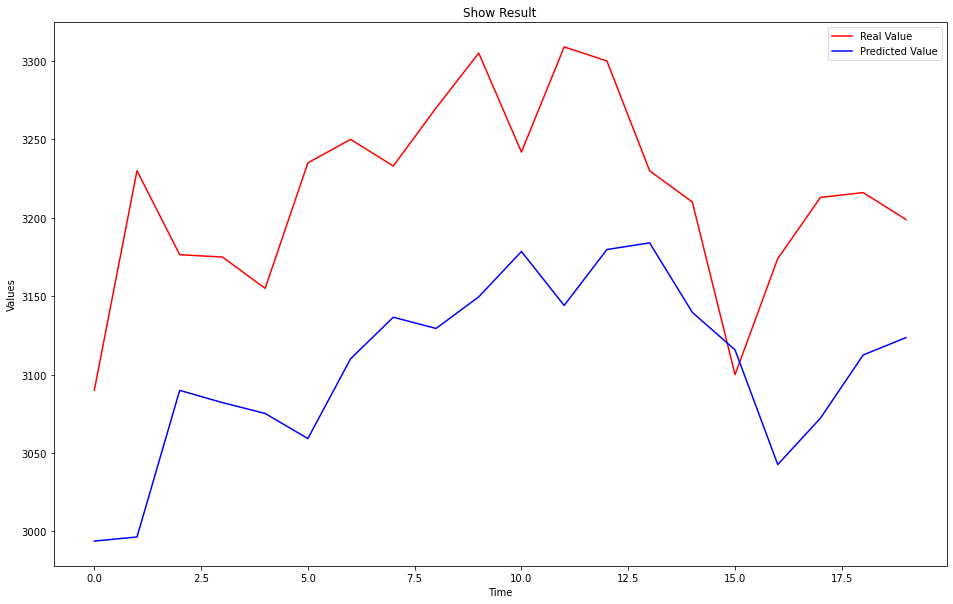

In [16]:
plt.figure(figsize=(16,10))
plt.plot(real_stock_price, color = 'r', label='Real Value')
plt.plot(predicted_stock_price, color = 'b', label='Predicted Value')
plt.title('Show Result')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Thank You!